In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.5 MB 1.4 MB/s eta 0:00:08
   --- ------------------------------------ 1.0/11.5 MB 1.4 MB/s eta 0:00:08
   ---- ----------------------------------- 1.3/11.5 MB 1.5 MB/s eta 0:00:07
   ----- ---------------------------------- 1.6/11.5 MB 1.6 MB/s eta 0:00:07
   ------- -------------------------------- 2.1/11.5 MB 1.6 MB/s eta 0:00:06
   ---------- ----------------------------- 2.9/11.5 MB 1.8 MB/s eta 0:00:05
   ----------- ---------------------------- 3.4/11.5 MB 2.0 MB/s eta 0:00:05
   -------------- ------------------------- 4.2/11.5 MB 2.2 MB/s eta 0:00:04
   ----------------- ---------------------- 5.0/11.5 MB 2.3 MB/s eta 0:00:03
   ----------------

In [2]:
!ls -lrt

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
ls -lrt

 Volume in drive C is OS
 Volume Serial Number is 7275-C436

 Directory of C:\Users\Srija\Codes\Machine Learning\Learning\Simple NN



File Not Found


In [4]:
#We will actually Implement 3 class classification
#We will also Implement Back-Propogation here without any use of Tensorflow

In [1]:
print(df.columns.tolist())


NameError: name 'df' is not defined

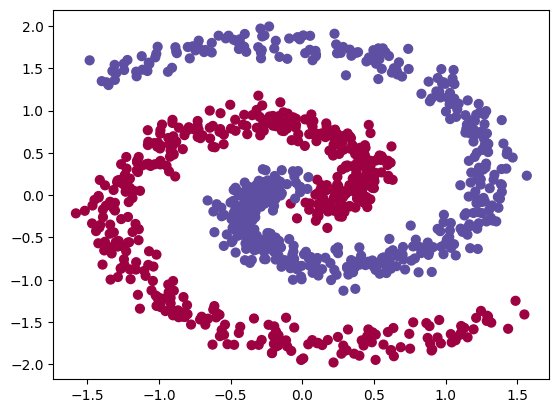

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("spiral.csv")
plt.scatter(df["X1"],df["X2"],c=df["y"] , s=40 , cmap=plt.cm.Spectral)
plt.show()
X=df.iloc[:,:-1].to_numpy()
y=df.iloc[:,-1].to_numpy()

In [14]:
#For any Coordinate the X axis belong to First Feature
#For any Coordinate the Y axis belong to Second Feature

In [3]:
df.head()

,Unnamed: 0,X1,X2,y
0,0,0.118647,-0.181079,0
1,1,0.022316,-0.088976,0
2,2,0.181717,0.072110,0
3,3,0.256028,-0.042128,0
4,4,0.250036,0.012372,0


import numpy as np

class NN:

    def __init__(self,n_features,n_hidden,n_classes):
        self.d=n_features
        self.h=n_hidden
        self.n=n_classes
        self.W1=0.01*np.random.randn(self.d,self.h)
        self.b1=np.zeros((1,self.h))  # fixed typo: zeroes -> zeros
        self.W2=0.01*np.random.randn(self.h,self.n)
        self.b2=np.zeros((1,self.n))  # fixed typo: zeroes -> zeros

    def fwd_prop(self,X):
        z1=np.dot(X,self.W1) + self.b1
        #ye A1 hi ReLU Activation fn hai
        A1=np.maximum(0,z1)  # fixed typo: Z1 -> z1
        z2=np.dot(A1,self.W2)+self.b2
        #Yaha z2 ko Ouput bolrahe
        #Numerical stability improvement for softmax
        exp_scores = np.exp(z2 - np.max(z2, axis=1, keepdims=True))
        A2=exp_scores/np.sum(exp_scores,axis=1,keepdims=True)
        #Ye last ka 2 cheez gives us Softmax function
        #My A2 will Literally give me the Probability
        #Like Forward Propogration is JUst 6 Line of Code
        #the Output of 1 layer Becomes the Input to The Other Layer
        return A1,A2
        #A2 is the final Probability

    def cce_loss(self,y,probs):
        #Ye humlog Cross Entropy Loss Implement Kiye hai from Scratch
        #Refer to copy
        num_examples=y.shape[0]
        correct_logprobs=-np.log(probs[range(num_examples),y])  # fixed typo: prob -> probs
        loss=np.sum(correct_logprobs)/num_examples
        return loss

    def back_prop(self,X,A1,A2,y):
        #Compute the graident on scores
        num_examples=y.shape[0]
        dz2=A2.copy()  # added .copy() to avoid modifying A2 outside
        dz2[range(num_examples),y]-=1
        #Here is the assignment.this code is lightly tricky since the y's here are not one hot encoded.The y's here are 1,2,3... 
        #so we have to do this jugaad to get 1,2,3 .. in One hot Encoding format in only subtracted
        #So take this code and print this value basically play with thsi code
        dz2/=num_examples
        #This 4 line code is repsonsible for determining the derivative of L(ce) with resepct to my output z2
        #First backprop into parameters W2 and b2
        dW2=np.dot(A1.T,dz2)
        db2=np.sum(dz2,axis=0,keepdims=True)
        #next backprop into hidden layer , A1
        dA1=np.dot(dz2,self.W2.T)
        #ye wahi hum dl/dA1 kiye hai
        #backprop the ReLU non - linearity
        dA1[A1<=0]=0
        #finally into W,b
        dz1=dA1
        dW1=np.dot(X.T,dz1)
        db1=np.sum(dz1,axis=0,keepdims=True)  # fixed typo: keepdtime -> keepdims
        #for getting Derivative w.r.t z1

        return dW1,db1,dW2,db2
        #Basically it returns derivative

    #This fit function basically does the Training
    def fit(self,X,y,lr,reg,max_iters):  # Added missing y parameter
        #Doing Bunch of Iteration and in each iteration it is doing full gradient descent by passing everything
        #in the Gradient descent it is doint Forward Prop , calculating the loss, adding the regularization ,and for every 1000 iteration it prints the loss
        #it does back prop , gets the every partial derivative , add the regularization because of derivative and simply perfrom the updation

        num_examples=X.shape[0]
        #I am doing some maximum number of iteration
        for i in range(max_iters):
            #forward Propogration 
            A1,A2=self.fwd_prop(X)
            #then Calculate the loss
            data_loss=self.cce_loss(y,A2)  # fixed: y2 -> y
            #Yaha loss hum cross entropy use krke nikal rhe hai
            reg_loss=0.5*reg*np.sum(self.W1*self.W1) + 0.5*reg*np.sum(self.W2*self.W2)
            loss=data_loss + reg_loss
            #upar ke 3 line me hum compute krrhe hai Cross Entropy Loss ko

            if i%1000==0:
            #For every 100 iteration i'll print the loss
                print("Iteration %d : loss %f"% (i,loss))

            #Ab backward Propogation Krrhe hai 
            #Basically it is just Partial Derivative wrt Losses
            dW1,db1,dW2,db2=self.back_prop(X,A1,A2,y)

            #Add regulaization gradient Contribution
            #Basiclaly add the Gradient because of regularization
            dW2+=reg*self.W2
            dW1+=reg*self.W1

            #perfrom a parameter Update 
            #Phir yaha Parameter Update krrhe based on learning rates
            self.W1+=-lr*dW1
            self.b1+=-lr*db1
            self.W2+=-lr*dW2  # fixed typo: bW2 -> dW2
            self.b2+=-lr*db2

    def predict(self,X):
        #Agar humlog X ko as a Data Matix pass krenge
        #To humlog basically X.w1 krenge phle +b1 and on top of it i am applying reLU that result A1,which i am multiplying with w2 + b2 , and i simply saying my class level is max of all these basically that will be our class level
        #it i want absolute value class level instead of probabilistic class Level
        A1=np.maximum(0,np.dot(X,self.W1) + self.b1)
        scores=np.dot(A1,self.W2) + self.b2
        y_hat=np.argmax(scores,axis=1)  # fixed typo: Z2 -> scores for consistency
        return y_hat

# Example usage:
#nn_model=NN(n_features=2,n_hidden=100,n_classes=3)
# phir ye fit humlog ko training krega , Jisme X humlog ka Data Matrix and lr mtlb earning rate hai and regulairzattion hai and i am doing maximum of 10000 iterations
# Option 1 solution (recommended if your data has 3 features)
nn_model = NN(n_features=2, n_hidden=100, n_classes=3)
nn_model.fit(X, y, lr=1, reg=1e-3, max_iters=10000)  # Reduced iterations for faster testing
print("Training Accuracy: %.2f" % (np.mean(nn_model.predict(X)==y)))
# here i am predicting what is my perfromance on training data qki we are suing the single dataset



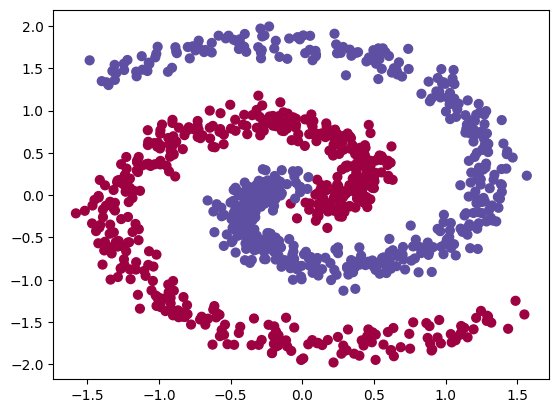

     Unnamed: 0        X1        X2  y
0             0  0.118647 -0.181079  0
1             1  0.022316 -0.088976  0
2             2  0.181717  0.072110  0
3             3  0.256028 -0.042128  0
4             4  0.250036  0.012372  0
..          ...       ...       ... ..
995         995 -1.484234  1.592692  1
996         996 -1.352414  1.300645  1
997         997 -1.399816  1.347010  1
998         998 -1.308200  1.361328  1
999         999 -1.366256  1.333302  1

[1000 rows x 4 columns]
(1000, 2)
(1000,)


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and visualize data
df = pd.read_csv("spiral.csv")
plt.scatter(df["X1"], df["X2"], c=df["y"], s=40, cmap=plt.cm.Spectral)
plt.show()
print(df)
X = df[["X1", "X2"]].to_numpy()
y = df.iloc[:, -1].to_numpy()
print(X.shape)  # Should be (N, 2)
print(y.shape)  # Should be (N,)

In [26]:
class NN:
    def __init__(self, n_features, n_hidden, n_classes):
        self.d = n_features
        self.h = n_hidden
        self.n = n_classes
        self.W1 = 0.01 * np.random.randn(self.d, self.h)
        self.b1 = np.zeros((1, self.h))
        self.W2 = 0.01 * np.random.randn(self.h, self.n)
        self.b2 = np.zeros((1, self.n))

    def fwd_prop(self, X):
        z1 = np.dot(X, self.W1) + self.b1
        A1 = np.maximum(0, z1)  # ReLU activation
        z2 = np.dot(A1, self.W2) + self.b2
        z2 = np.exp(z2 - np.max(z2, axis=1, keepdims=True))  # Numerical stability
        A2 = z2 / np.sum(z2, axis=1, keepdims=True)  # Softmax
        return A1, A2

    def cce_loss(self, y, probs):
        num_examples = y.shape[0]
        correct_logprobs = -np.log(probs[range(num_examples), y])
        loss = np.sum(correct_logprobs) / num_examples
        return loss

    def back_prop(self, X, A1, A2, y):
        num_examples = y.shape[0]
        dz2 = A2.copy()
        dz2[range(num_examples), y] -= 1
        dz2 /= num_examples
        dW2 = np.dot(A1.T, dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)
        dA1 = np.dot(dz2, self.W2.T)
        dA1[A1 <= 0] = 0  # ReLU derivative
        dz1 = dA1
        dW1 = np.dot(X.T, dz1)
        db1 = np.sum(dz1, axis=0, keepdims=True)
        return dW1, db1, dW2, db2

    def fit(self, X, y, lr, reg, max_iters):
        num_examples = X.shape[0]
        for i in range(max_iters):
            A1, A2 = self.fwd_prop(X)
            data_loss = self.cce_loss(y, A2)
            reg_loss = 0.5 * reg * np.sum(self.W1 * self.W1) + 0.5 * reg * np.sum(self.W2 * self.W2)
            loss = data_loss + reg_loss

            if i % 1000 == 0:
                print(f"Iteration {i}: loss {loss:.4f}")
            
            dW1, db1, dW2, db2 = self.back_prop(X, A1, A2, y)

            # Add regularization derivatives
            dW2 += reg * self.W2
            dW1 += reg * self.W1

            # Update parameters
            self.W1 -= lr * dW1
            self.b1 -= lr * db1
            self.W2 -= lr * dW2
            self.b2 -= lr * db2

    def predict(self, X):
        A1 = np.maximum(0, np.dot(X, self.W1) + self.b1)
        z2 = np.dot(A1, self.W2) + self.b2
        y_hat = np.argmax(z2, axis=1)
        return y_hat

nn_model=NN(n_features=2,n_hidden=100,n_classes=3)
nn_model.fit(X,y,lr=1,reg=1e-3,max_iters=10000)
print("Training Accuracy: %.2f" % (np.mean(nn_model.predict(X)==y)))

Iteration 0: loss 1.0988
Iteration 1000: loss 0.1169
Iteration 2000: loss 0.1139
Iteration 3000: loss 0.1134
Iteration 4000: loss 0.1133
Iteration 5000: loss 0.1132
Iteration 6000: loss 0.1131
Iteration 7000: loss 0.1131
Iteration 8000: loss 0.1131
Iteration 9000: loss 0.1131
Training Accuracy: 0.99
